# Lecture 7

This week, we'll have a running Colab that we can all try understanding concepts with.

In [ ]:
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_training.txt
!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_QC.txt
!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/muvec.txt

--2023-02-23 03:00:06--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_training.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1027392 (1003K) [text/plain]
Saving to: ‘bubblegum_training.txt’

bubblegum_training. 100%[===================>]   1003K  --.-KB/s    in 0.07s   

2023-02-23 03:00:06 (13.4 MB/s) - ‘bubblegum_training.txt’ saved [1027392/1027392]

--2023-02-23 03:00:06--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_QC.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1028 (1.0K) [text/plain]
Saving to: ‘bubblegum_QC.txt’

bubblegum_QC.txt    100%[===================>]   1.00K  --.-KB/s    in 0s      

2023-02-23

# The Data

This is data from a factory that manufactures peach bubblegum en masse, DripperLabs. There are ten features that are measured for each sample off the factory floor; these correspond to:

* Resin - main chewable part
* Wax - gum softener
* Elastomer - flexibility
* Sweeteners - delays the release of flavour. 
* Glycerine - maintains moistness. 
* Softener - soften the gum
* Plasticiser -  increases flexibility 
* Flavours - taste and sensory appeal
* Colours - visual appeal. 
* Polyol Coating - maintain the quality 

If you'd like to read more, feel free to review [GooRoo's blog post](https://www.gooroo.com/blog/chewing-gum/)


In [ ]:
train_data = np.loadtxt("bubblegum_training.txt",delimiter=",")
inference_data = np.loadtxt("bubblegum_QC.txt", delimiter=",")

# To sanity check, load in the known target values
mean_data = np.loadtxt("muvec.txt", delimiter=",")

In [ ]:
print(mean_data)

[50.  4. 27. 18. 10. 21. 30. 13. 60. 19.]


# Calculate the parameters of your Gaussian Model

Using the training data, determine the maximum likelihood of the mean and standard deviation for each dimension.

Recall that these are:

$$\mu_i = \sum_{n=1}^N \frac{x^{(n)}_i}{N}$$

and

$$\sigma_i = \sum_{n=1}^N \frac{(x^{(n)}_i - \mu_i) ^2}{N} $$

In [ ]:
# YOUR CODE HERE
#mean
miu = train_data.mean(axis = 0)
#standard deviation
std = train_data.std(axis = 0)

# Probability of a Sample

Write a function that takes your parameters and calculates the probabiliy of this sample occurring with the Gaussian Model. If all goes well, you should have the following outliers:

`[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]`

You may wish to use the log likelihood (i.e., take the log of your PDF).

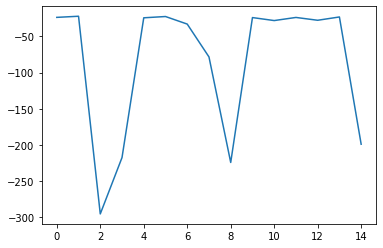

In [ ]:
# YOUR CODE HERE
from scipy.stats import multivariate_normal
model = multivariate_normal(mean = miu, cov = np.eye(10)*std**2)

#Alternative way, lecture slides
from scipy.stats import norm

modelu = dict()
#for every dimension, create a model fit gaussian distribution
for i in range(10):
  modelu[i] = norm(miu[i], std[i])

inferred = 1
for i in range(10):
  inferred *= modelu[i].pdf(inference_data) #multiply each model

#inferred <= threshold?

# plt.plot(model.pdf(inference_data))
plt.plot(np.log(model.pdf(inference_data)))

# Regression and Function Estimation

Downloads the data from [here](https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-7/housing_data.txt) and creates some helper functions for the remainder of the lecture.

In [ ]:
#@title Download Univariate Housing Data (RUN ME)

!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-7/housing_data.txt
housing_data = np.loadtxt("housing_data.txt", delimiter=",")

x = housing_data[0]
y = housing_data[1]

plt.suptitle('Housing prices in OR')
plt.xlabel('square feet')
plt.ylabel('Prices (thousands of $)')
plt.scatter(x,y)

def plotdata(m, b, x=None, y=None):
    
    if x is None:
        x = np.linspace(500,3000,50) + np.random.randn(50)
    if y is None:
        y = np.linspace(150,480,50) + 30.0*np.random.randn(50)
    
    x_ = np.linspace(400,3400,1000)
    
    plt.scatter(x,y)
    plt.suptitle('Housing prices in OR',fontsize=15)
    plt.xlabel('square feet',fontsize=15)
    plt.ylabel('Prices (thousands of $)',fontsize=15)
    plt.plot(x_, fx(m,x_,b), c='r', linewidth=2)

# Forward Prediction Model

Write a function $y = f(x)$ that uses parameters $m$ and $b$ to predict the the price of a house $y$ with square footage $x$ alone. You don't need to solve for $m$ and $b$ just yet. That is, provide a function $y = f_{m,b}(x) = mx + b$, the linear regression.

```
def fx(m, x, b):
  return <YOUR-CODE-HERE>
```

Also write a function for the mean squared error loss function 

$$L = \displaystyle\sum_{n=1}^N (y^{(n)} - (mx^{(n)} + b))^2$$

where $n$ denotes the $n^{th}$ instance of the data point tuple $(x^{(n)}, y^{(n)})$, and $m$ and $b$ are parameters.

```
def mse_loss(x, y, m, b):
  return <YOUR-CODE-HERE>
```

In [ ]:
def fx(m, x, b):
  return 0 # YOUR CODE HERE

def mse_loss(x, y, m, b):
  return 0 # YOUR CODE HERE

# Analytical Solution

Find the analytical solution to the maximum likelihood estimate of $m$ and $b$ with the following loss function below:

$$ L = \sum_i (y^{(i)} - (mx^{(i)} + b))^2 $$

Here, $(x^{(i)}, y^{(i)})$ is the $i^{th}$ sample in the data. Let's first take the gradient with respect to $m$:

$$\nabla_m L = \sum_i -2^{(i)} ( y^{(i)} - (mx^{(i)} + b) )$$

$$\nabla_m L = \text{ ?? <-- your answer here} $$

You can analytically solve this by setting $\nabla_m L = 0$ and $\nabla_b L = 0$. You will that this is not true of many other functions.

# Optimization Space

Plot the optimization space

In [ ]:
m = np.linspace(-5,10,100)
b = np.linspace(-2600,400,100)
L = [[  mse_loss(x, y, mi, bi) for mi in m ] for bi in b ]
L = np.array(L)

# Create the axes
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

M,B=np.meshgrid(m,b)
ax.plot_wireframe(M, B, L, rstride=2, cstride=2)


ax.set_xlabel('m (slope)')
ax.set_ylabel('b (intercept)')
ax.set_zlabel('L(x,y,m,b)')

In [ ]:
figure, axis = plt.subplots(1,2)


L = [ mse_loss(x, y, mi, 0) for mi in m ]
axis[0].plot(m, L)
axis[0].set_title("Loss as a function of slope")

L = [ mse_loss(x, y, 1, bi) for bi in b ]
axis[1].plot(b, L)
axis[1].set_title("Loss as a function of intercept")

# Gradient Descent

Write functions for gradient of the loss function $L$ with respect to $m$ and $b$. That is, write:

* $\nabla_m L(m,b)$
* $\nabla_b L(m, b)$

You should have the equations from your derivation above. (Don't set to zero.)

In [ ]:
def deriv_m(x, y, m, b):
  return 0

def deriv_b(x, y, m, b):
  return 0


In [ ]:
from IPython import display
import time

# Randomly initialize
m = np.random.randn(1) / 2.0
b = np.float32( np.random.randint(-100, 100 ) )
print (m, b)

batchsize = 20 
N = x.shape[0]

mrate = 5e-9
brate = 1e-4
iterations = 50

objective = np.zeros( iterations )
for i in range(0, iterations):
    
    randombatch = np.random.randint(0, N, batchsize)

    # Choose a random batch to optimize with
    xb = x[ randombatch ]
    yb = y[ randombatch ]

    # Calculate the gradient
    m_update = mrate * deriv_m(xb, yb, m, b) 
    b_update = brate * deriv_b(xb, yb, m, b) 

    # Take a step in the direction of the gradient
    m = m - m_update
    b = b - b_update
   
    # Calculate the loss function
    objective[i] = mse_loss(x, y, m, b)

    plt.clf()
    plotdata( m, b, x, y )
    plt.scatter(xb,yb,c='m')
    print("(dm=%f,db=%f),(m,b)=(%f,%f),L=%f"%(m_update,b_update,m,b,objective[i]))
 
    
    # ch = raw_input()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    time.sleep(1.0)
    

What's the predicted price based on a parameterized linear regression solved through maximum likelihood of a house at 1750 square feet?

In [ ]:
fx(1750, m, b)

# The Sigmoid Function

Implement 

$$\sigma(x) = \frac{1}{1 + e^{- x }}$$

In [ ]:
def sigmoid(x):
  return x # YOUR CODE HERE

Play around with the sigmoid function. Instead of using $x$, try $mx + b$. What happens if you change $b$? How about $m$?

In [ ]:
x = np.linspace(-20, 20, 1000)
plt.plot( x, sigmoid(x) )